In [1]:
# Supress Warnings and import the required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
lead = pd.read_csv("Leads.csv")

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.shape

(9240, 37)

In [4]:
# Conversion rate

round(lead["Converted"].sum()/len(lead.index),2)

0.39

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead.columns = lead.columns.str.strip().str.replace(' ', '_')

In [8]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How_did_you_hear_about_X_Education               23.89
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_

In [9]:
# target variable
lead['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [10]:
#  uniques in the dataset
lead.nunique()

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                         5
Lead_Source                                        21
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
TotalVisits                                        41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     19
How_did_you_hear_about_X_Education                 10
What_is_your_current_occupation                     6
What_matters_most_to_you_in_choosing_a_course       3
Search                                              2
Magazine                                            1
Newspaper_Article           

In [11]:
# replace select with nan
lead=lead.replace('Select',np.nan)

# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_

In [12]:
# drop unnecessary columns
lead = lead.drop(['Asymmetrique_Profile_Index','Asymmetrique_Activity_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score','Lead_Profile','Tags','Lead_Quality','How_did_you_hear_about_X_Education','City','Lead_Number'],axis=1)

In [13]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper 

In [14]:
# lets find the columns with single unique value
lead.nunique()

Prospect_ID                                      9240
Lead_Origin                                         5
Lead_Source                                        21
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
TotalVisits                                        41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     18
What_is_your_current_occupation                     6
What_matters_most_to_you_in_choosing_a_course       3
Search                                              2
Magazine                                            1
Newspaper_Article                                   2
X_Education_Forums                                  2
Newspaper                   

In [15]:
# drop the columns with single unique value
lead=lead.drop(['Magazine', 'Receive_More_Updates_About_Our_Courses', 'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content', 'I_agree_to_pay_the_amount_through_cheque'],axis=1)

#### Target variable VS Other continuous variables

<Axes: xlabel='Converted', ylabel='Total_Time_Spent_on_Website'>

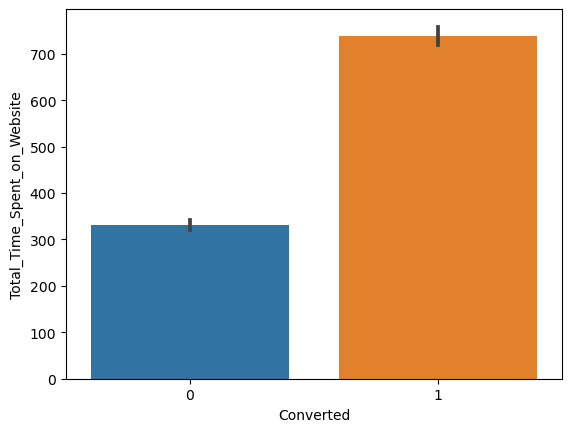

In [16]:

sns.barplot(x=lead['Converted'],y=lead['Total_Time_Spent_on_Website'])

There is good amount of variance so this variable can be a good predictor.

<Axes: xlabel='Converted', ylabel='TotalVisits'>

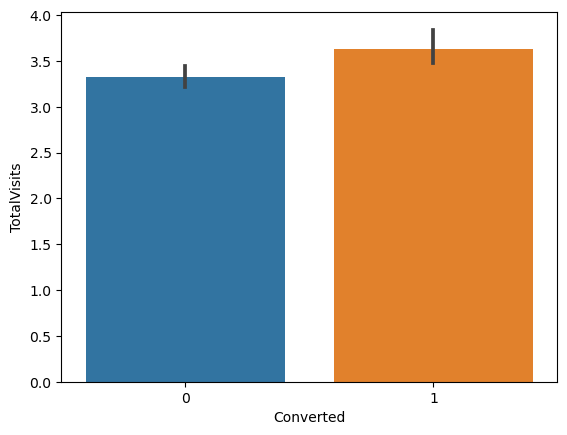

In [17]:
sns.barplot(x=lead['Converted'],y=lead['TotalVisits'])

As there is no significant variance so this variable may not be good predictor.

<Axes: xlabel='Converted', ylabel='Page_Views_Per_Visit'>

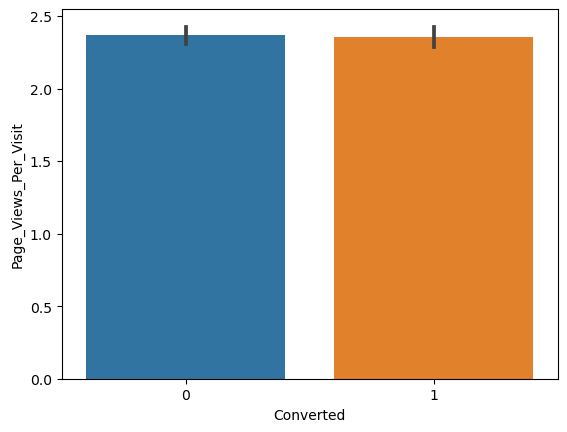

In [18]:
sns.barplot(x=lead['Converted'],y=lead['Page_Views_Per_Visit'])

As there is no significant variance so this variable may not be good predictor

### Checking data type and count in categorical variables

In [19]:
print(lead["Lead_Origin"].value_counts())
print('NaN count:', lead["Lead_Origin"].isnull().sum())

Lead_Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
NaN count: 0


In [20]:
print(lead["Lead_Source"].value_counts())
print('NaN count:', lead["Lead_Source"].isnull().sum())

Lead_Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
NaN count: 36


In [21]:
print(lead["Do_Not_Email"].value_counts())
print('NaN count:', lead["Do_Not_Email"].isnull().sum())

Do_Not_Email
No     8506
Yes     734
Name: count, dtype: int64
NaN count: 0


In [22]:
print(lead["Do_Not_Call"].value_counts())
print('NaN count:', lead["Do_Not_Call"].isnull().sum())

Do_Not_Call
No     9238
Yes       2
Name: count, dtype: int64
NaN count: 0


In [23]:
print(lead["Country"].value_counts())
print('NaN count:', lead["Country"].isnull().sum())

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [24]:
print(lead["Specialization"].value_counts())
print('NaN count:', lead["Specialization"].isnull().sum())

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64
NaN count: 3380


In [25]:
print(lead["What_is_your_current_occupation"].value_counts())
print('NaN count:', lead["What_is_your_current_occupation"].isnull().sum())

What_is_your_current_occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64
NaN count: 2690


In [26]:
print(lead["What_matters_most_to_you_in_choosing_a_course"].value_counts())
print('NaN count:', lead["What_matters_most_to_you_in_choosing_a_course"].isnull().sum())

What_matters_most_to_you_in_choosing_a_course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64
NaN count: 2709


In [27]:
print(lead["Search"].value_counts())
print('NaN count:', lead["Search"].isnull().sum())

Search
No     9226
Yes      14
Name: count, dtype: int64
NaN count: 0


In [28]:
print(lead["Newspaper_Article"].value_counts())
print('NaN count:', lead["Newspaper_Article"].isnull().sum())

Newspaper_Article
No     9238
Yes       2
Name: count, dtype: int64
NaN count: 0


In [29]:
print(lead["X_Education_Forums"].value_counts())
print('NaN count:', lead["X_Education_Forums"].isnull().sum())

X_Education_Forums
No     9239
Yes       1
Name: count, dtype: int64
NaN count: 0


In [30]:
print(lead["Newspaper"].value_counts())
print('NaN count:', lead["Newspaper"].isnull().sum())

Newspaper
No     9239
Yes       1
Name: count, dtype: int64
NaN count: 0


In [31]:
print(lead["Digital_Advertisement"].value_counts())
print('NaN count:', lead["Digital_Advertisement"].isnull().sum())

Digital_Advertisement
No     9236
Yes       4
Name: count, dtype: int64
NaN count: 0


In [32]:
print(lead["Through_Recommendations"].value_counts())
print('NaN count:', lead["Through_Recommendations"].isnull().sum())

Through_Recommendations
No     9233
Yes       7
Name: count, dtype: int64
NaN count: 0


In [33]:
print(lead["A_free_copy_of_Mastering_The_Interview"].value_counts())
print('NaN count:', lead["A_free_copy_of_Mastering_The_Interview"].isnull().sum())

A_free_copy_of_Mastering_The_Interview
No     6352
Yes    2888
Name: count, dtype: int64
NaN count: 0


In [34]:
print(lead["Last_Notable_Activity"].value_counts())
print('NaN count:', lead["Last_Notable_Activity"].isnull().sum())

Last_Notable_Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64
NaN count: 0


In [35]:
print(lead["Last_Activity"].value_counts())
print('NaN count:', lead["Last_Activity"].isnull().sum())

Last_Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64
NaN count: 103


### Data Cleaning

In [36]:
lead['Lead_Source'].replace('google','Google', inplace=True)
lead['Lead_Source'].replace('Welingak Website','others', inplace=True)
lead['Lead_Source'].replace('Referral Sites','others', inplace=True)
lead['Lead_Source'].replace('Reference','others', inplace=True)
lead['Specialization'].replace('Select','not declared', inplace=True) 
lead['What_matters_most_to_you_in_choosing_a_course'].fillna('not declared', inplace=True)
lead['Country'].fillna('not declared', inplace=True)
lead['Specialization'].fillna('not declared', inplace=True) 
lead['What_is_your_current_occupation'].fillna('not declared', inplace=True)

In [37]:
def catg(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not declared":
        category = "Not Declared"
    else:
        category = "Outside India"
    return category

lead['Country'] = lead.apply(lambda x:catg(x['Country']), axis = 1)

In [38]:
low_entries=lead[(lead['Lead_Source']=='bing') | (lead['Lead_Source']=='Facebook') | (lead['Lead_Source']=='Click2call') | 
                 (lead['Lead_Source']=='Press_Release') |
             (lead['Lead_Source']=='Social Media') | (lead['Lead_Source']=='Live Chat') | (lead['Lead_Source']=='blog') | 
             (lead['Lead_Source']=='youtubechannel') | (lead['Lead_Source']=='NC_EDM') | (lead['Lead_Source']=='testone') |
            (lead['Lead_Source']=='WeLearn') | (lead['Lead_Source']=='Pay per Click Ads') | (lead['Lead_Source']=='welearnblog_Home')|
           (lead['Lead_Origin']=='Quick Add Form')|(lead['Lead_Origin']=='Lead Import') |(lead['What_is_your_current_occupation']=='Other') |
                 (lead['What_is_your_current_occupation']=='Housewife') 
           |(lead['What_is_your_current_occupation']=='Businessman')  |(lead['What_matters_most_to_you_in_choosing_a_course']=='Flexibility & Convenience')  |
                 (lead['What_matters_most_to_you_in_choosing_a_course']=='Other')
            |(lead['Last_Notable_Activity']=='Unsubscribed') |(lead['Last_Notable_Activity']=='Email Bounced') |(lead['Last_Notable_Activity']=='Unreachable ')
            |(lead['Last_Notable_Activity']=='Had a Phone Conversation') |(lead['Last_Notable_Activity']=='Email Marked Spam ') |(lead['Last_Notable_Activity']=='Approached upfront')
            |(lead['Last_Notable_Activity']=='Form Submitted on Website') |(lead['Last_Notable_Activity']=='Resubscribed to emails') |(lead['Last_Notable_Activity']=='View in browser link Clicked')
            |(lead['Last_Notable_Activity']=='Email Received')|(lead['Last_Notable_Activity']=='Unreachable')|(lead['Last_Notable_Activity']=='Unreachable')
             | (lead['Specialization']=='Services Excellence')].index

lead=lead.drop(low_entries)

In [39]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8927 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    8927 non-null   object 
 1   Lead_Origin                                    8927 non-null   object 
 2   Lead_Source                                    8895 non-null   object 
 3   Do_Not_Email                                   8927 non-null   object 
 4   Do_Not_Call                                    8927 non-null   object 
 5   Converted                                      8927 non-null   int64  
 6   TotalVisits                                    8818 non-null   float64
 7   Total_Time_Spent_on_Website                    8927 non-null   int64  
 8   Page_Views_Per_Visit                           8818 non-null   float64
 9   Last_Activity                                  8843 non-n

In [40]:
# drop insignificant variables
cols=['Search','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement',
      'Through_Recommendations','Do_Not_Call','Last_Activity']
lead =lead.drop(columns=cols, axis=0)

In [41]:
# confirm the changes
print(lead["Lead_Origin"].value_counts())
print(lead["Lead_Source"].value_counts())
print(lead["Do_Not_Email"].value_counts())
print(lead["Converted"].value_counts())
print(lead["Country"].value_counts())
print(lead["Specialization"].value_counts())
print(lead["What_is_your_current_occupation"].value_counts())
print(lead["What_matters_most_to_you_in_choosing_a_course"].value_counts())
print(lead["A_free_copy_of_Mastering_The_Interview"].value_counts())
print(lead["Last_Notable_Activity"].value_counts())

Lead_Origin
Landing Page Submission    4727
API                        3502
Lead Add Form               698
Name: count, dtype: int64
Lead_Source
Google            2803
Direct Traffic    2461
Olark Chat        1729
Organic Search    1119
others             783
Name: count, dtype: int64
Do_Not_Email
No     8318
Yes     609
Name: count, dtype: int64
Converted
0    5486
1    3441
Name: count, dtype: int64
Country
India            6286
Not Declared     2363
Outside India     278
Name: count, dtype: int64
Specialization
not declared                         3284
Finance Management                    947
Human Resource Management             823
Marketing Management                  816
Operations Management                 489
Business Administration               387
IT Projects Management                359
Supply Chain Management               338
Banking, Investment And Insurance     333
Travel and Tourism                    197
Media and Advertising                 193
International Bus

In [42]:
# checking the nulls 
print(((lead.isnull().sum()/len(lead))*100).sort_values(ascending=False),'%')

TotalVisits                                      1.221015
Page_Views_Per_Visit                             1.221015
Lead_Source                                      0.358463
Prospect_ID                                      0.000000
Lead_Origin                                      0.000000
Do_Not_Email                                     0.000000
Converted                                        0.000000
Total_Time_Spent_on_Website                      0.000000
Country                                          0.000000
Specialization                                   0.000000
What_is_your_current_occupation                  0.000000
What_matters_most_to_you_in_choosing_a_course    0.000000
A_free_copy_of_Mastering_The_Interview           0.000000
Last_Notable_Activity                            0.000000
dtype: float64 %


#### Create countplots of categorical variable for target variable

<Axes: xlabel='Lead_Origin', ylabel='count'>

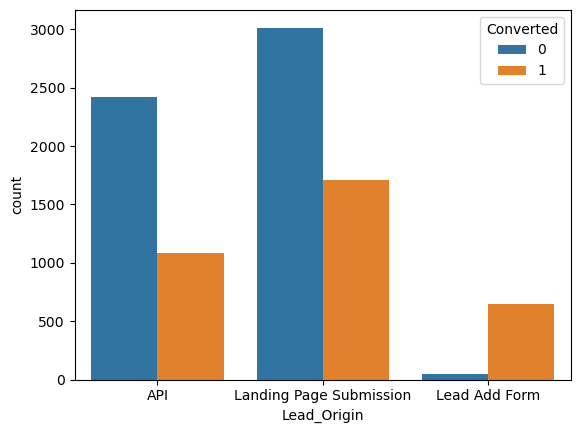

In [43]:
sns.countplot(x='Lead_Origin', hue='Converted', data=lead)

<Axes: xlabel='Lead_Source', ylabel='count'>

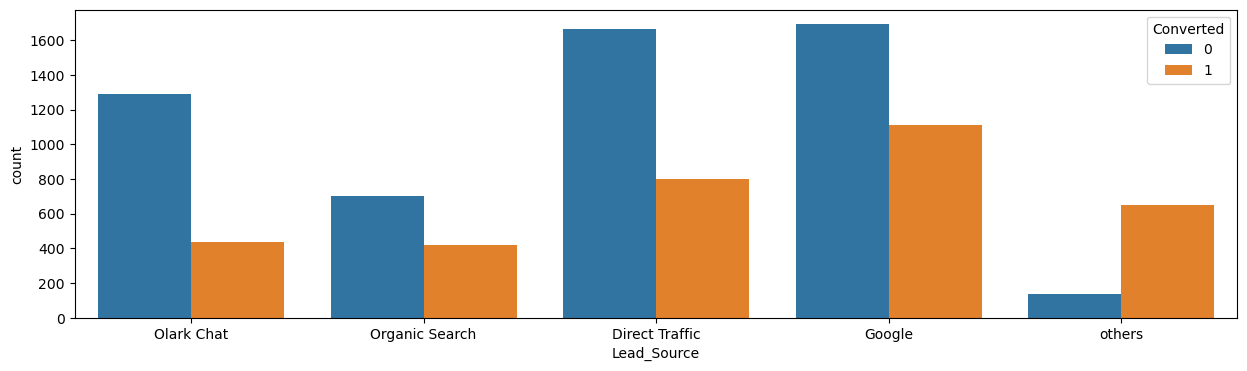

In [44]:
plt.figure(figsize=(15,4))
sns.countplot(x='Lead_Source', hue='Converted', data=lead)

<Axes: xlabel='Do_Not_Email', ylabel='count'>

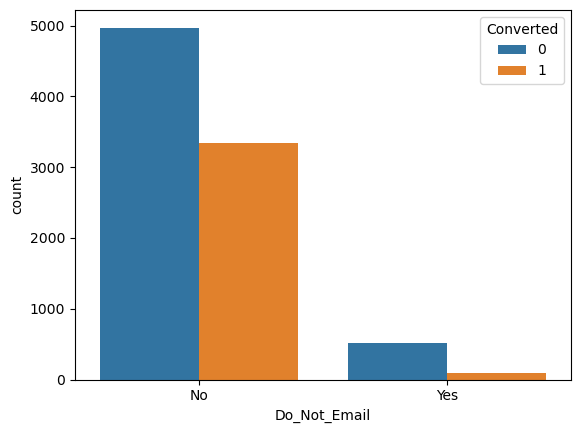

In [45]:
sns.countplot(x='Do_Not_Email', hue='Converted', data=lead)

<Axes: xlabel='Last_Notable_Activity', ylabel='count'>

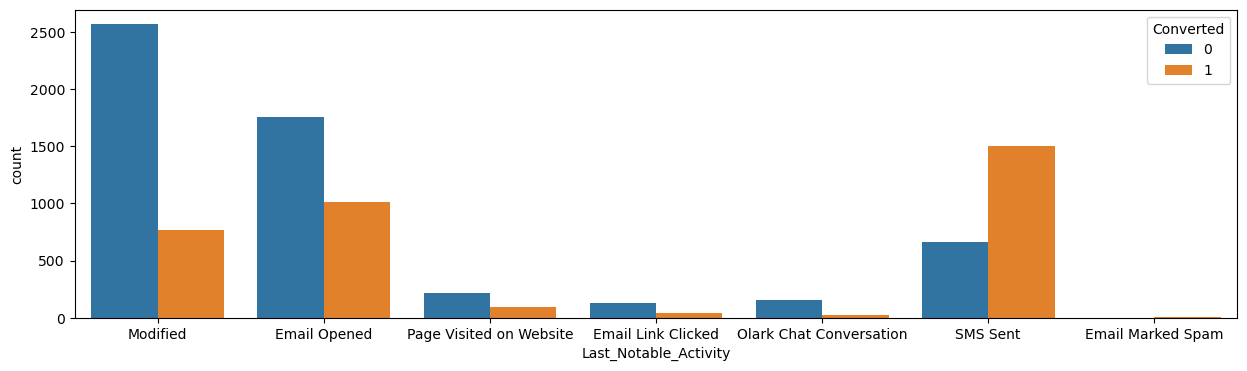

In [46]:
plt.figure(figsize=(15,4))
sns.countplot(x='Last_Notable_Activity', hue='Converted', data=lead)

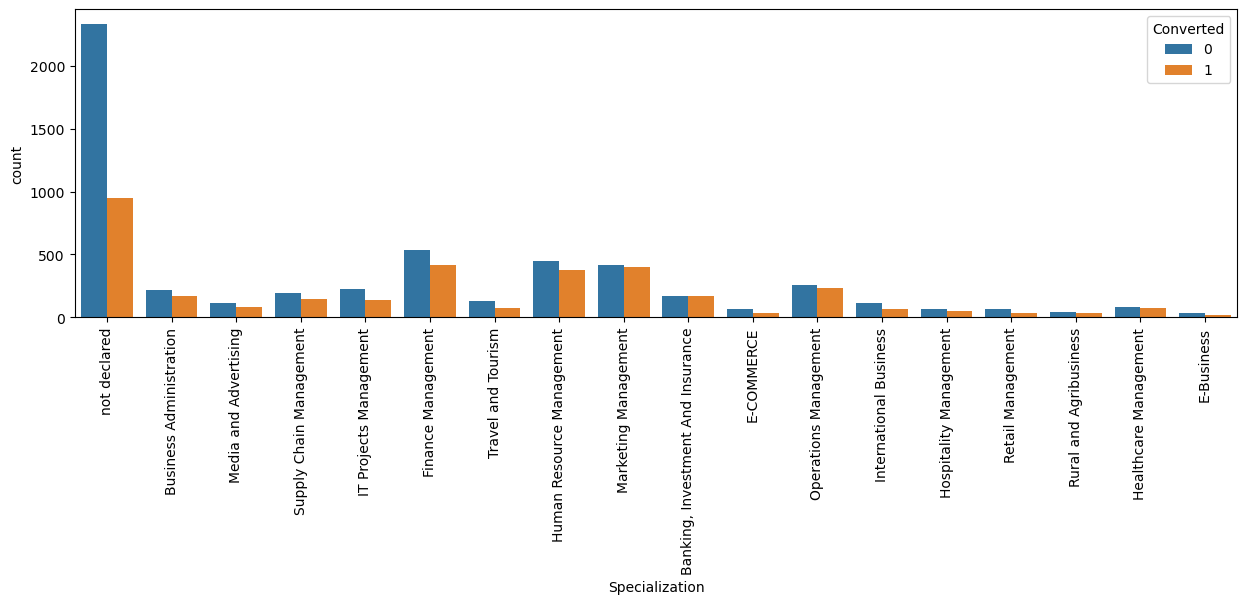

In [47]:
plt.figure(figsize=(15,4))
plott=sns.countplot(x='Specialization', hue='Converted', data=lead)
for item in plott.get_xticklabels():
    item.set_rotation(90)

<Axes: xlabel='What_is_your_current_occupation', ylabel='count'>

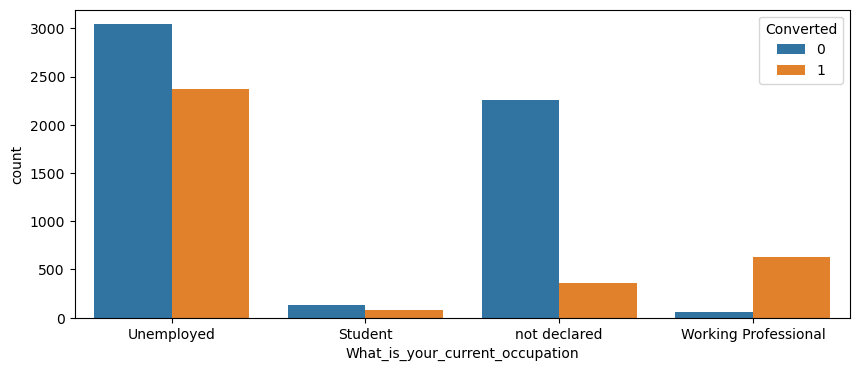

In [48]:
plt.figure(figsize=(10,4))
sns.countplot(x='What_is_your_current_occupation', hue='Converted', data=lead)

<Axes: xlabel='What_matters_most_to_you_in_choosing_a_course', ylabel='count'>

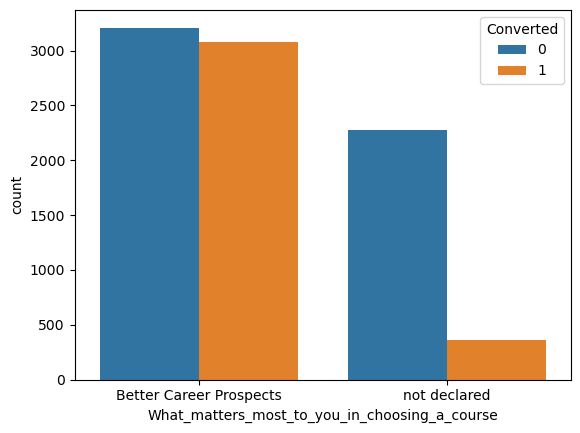

In [49]:
sns.countplot(x='What_matters_most_to_you_in_choosing_a_course', hue='Converted', data=lead)

<Axes: xlabel='A_free_copy_of_Mastering_The_Interview', ylabel='count'>

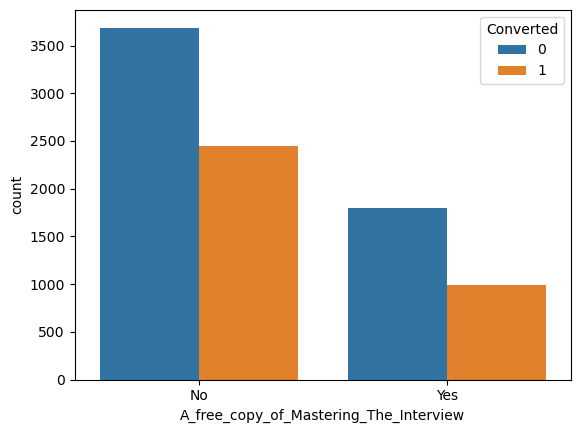

In [50]:
sns.countplot(x='A_free_copy_of_Mastering_The_Interview', hue='Converted', data=lead)

In [51]:
numeric=lead[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']]
numeric.describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,8818.000000,8927.000000,8818.000000
mean,3.440916,487.505769,2.359695
std,4.886250,548.219655,2.159544
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,938.000000,3.000000
max,251.000000,2272.000000,55.000000


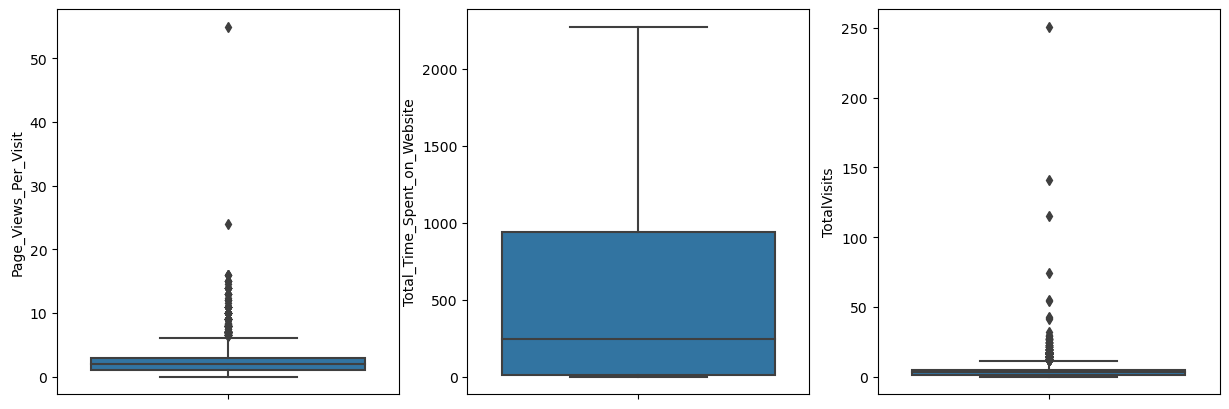

In [52]:
# Check for outliers
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y='Page_Views_Per_Visit', data=numeric)
plt.subplot(1,3,2)
sns.boxplot(y='Total_Time_Spent_on_Website', data=numeric)
plt.subplot(1,3,3)
sns.boxplot(y='TotalVisits', data=numeric)
plt.show()

In [53]:
# drop the nulls
lead.dropna(axis=0, inplace=True)

In [54]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    8792 non-null   object 
 1   Lead_Origin                                    8792 non-null   object 
 2   Lead_Source                                    8792 non-null   object 
 3   Do_Not_Email                                   8792 non-null   object 
 4   Converted                                      8792 non-null   int64  
 5   TotalVisits                                    8792 non-null   float64
 6   Total_Time_Spent_on_Website                    8792 non-null   int64  
 7   Page_Views_Per_Visit                           8792 non-null   float64
 8   Country                                        8792 non-null   object 
 9   Specialization                                 8792 non-n

#### Normalising the numerical variables

In [55]:
col_norm = ["TotalVisits","Total_Time_Spent_on_Website","Page_Views_Per_Visit"]

In [56]:
for i in col_norm:
    print(i, " Done")
    lead[i] = (lead[i]-min(lead[i]))/(max(lead[i])-min(lead[i]))

TotalVisits  Done
Total_Time_Spent_on_Website  Done
Page_Views_Per_Visit  Done


In [57]:
# Creating Dummy Variables
lead['Lead_Origin'].value_counts()
origin=pd.get_dummies(lead['Lead_Origin'],prefix='orgn')
origin=origin.drop('orgn_Lead Add Form', axis=1)

lead['Lead_Source'].value_counts()
source=pd.get_dummies(lead['Lead_Source'],prefix='src')
source=source.drop('src_others', axis=1)

lead['Do_Not_Email'].value_counts()
DNE=pd.get_dummies(lead['Do_Not_Email'],drop_first=True, prefix='dne')

lead['Specialization'].value_counts()
spcial=pd.get_dummies(lead['Specialization'],prefix='spcl')
spcial=spcial.drop('spcl_not declared', axis=1)

lead['What_is_your_current_occupation'].value_counts()
occupation=pd.get_dummies(lead['What_is_your_current_occupation'],prefix='occ')
occupation=occupation.drop('occ_not declared', axis=1)

lead['What_matters_most_to_you_in_choosing_a_course'].value_counts()
what=pd.get_dummies(lead['What_is_your_current_occupation'],prefix='what')
what=what.drop('what_not declared', axis=1)

lead['A_free_copy_of_Mastering_The_Interview'].value_counts()
intrvw=pd.get_dummies(lead['A_free_copy_of_Mastering_The_Interview'],prefix='intrvw',drop_first=True)

lead['Last_Notable_Activity'].value_counts()
last_note=pd.get_dummies(lead['Last_Notable_Activity'],prefix='last_note')
last_note=last_note.drop('last_note_Email Link Clicked', axis=1)

lead['Country'].value_counts()
cntry=pd.get_dummies(lead['Country'],prefix='country')
cntry=cntry.drop('country_Not Declared', axis=1)

In [58]:
leadn=lead.drop(columns=['Prospect_ID'], axis=1)
leadncol=['Converted','TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']
final=pd.concat([leadn[leadncol],origin,source,DNE,spcial,occupation,what,intrvw,last_note,cntry], axis=1)
final.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,orgn_API,orgn_Landing Page Submission,src_Direct Traffic,src_Google,src_Olark Chat,src_Organic Search,...,what_Working Professional,intrvw_Yes,last_note_Email Marked Spam,last_note_Email Opened,last_note_Modified,last_note_Olark Chat Conversation,last_note_Page Visited on Website,last_note_SMS Sent,country_India,country_Outside India
0,0,0.000000,0.000000,0.000000,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,0,0.019920,0.296655,0.045455,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,1,0.007968,0.674296,0.036364,False,True,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
3,0,0.003984,0.134243,0.018182,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,1,0.007968,0.628521,0.018182,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


In [59]:
final.shape

(8792, 43)

### Splitting data for Testing and Training

In [60]:
from sklearn.model_selection import train_test_split
x=final.drop('Converted', axis=1)
y=final['Converted']

from sklearn.preprocessing import LabelEncoder

# Convert 'y' to numeric using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [61]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=1000)

<Axes: >

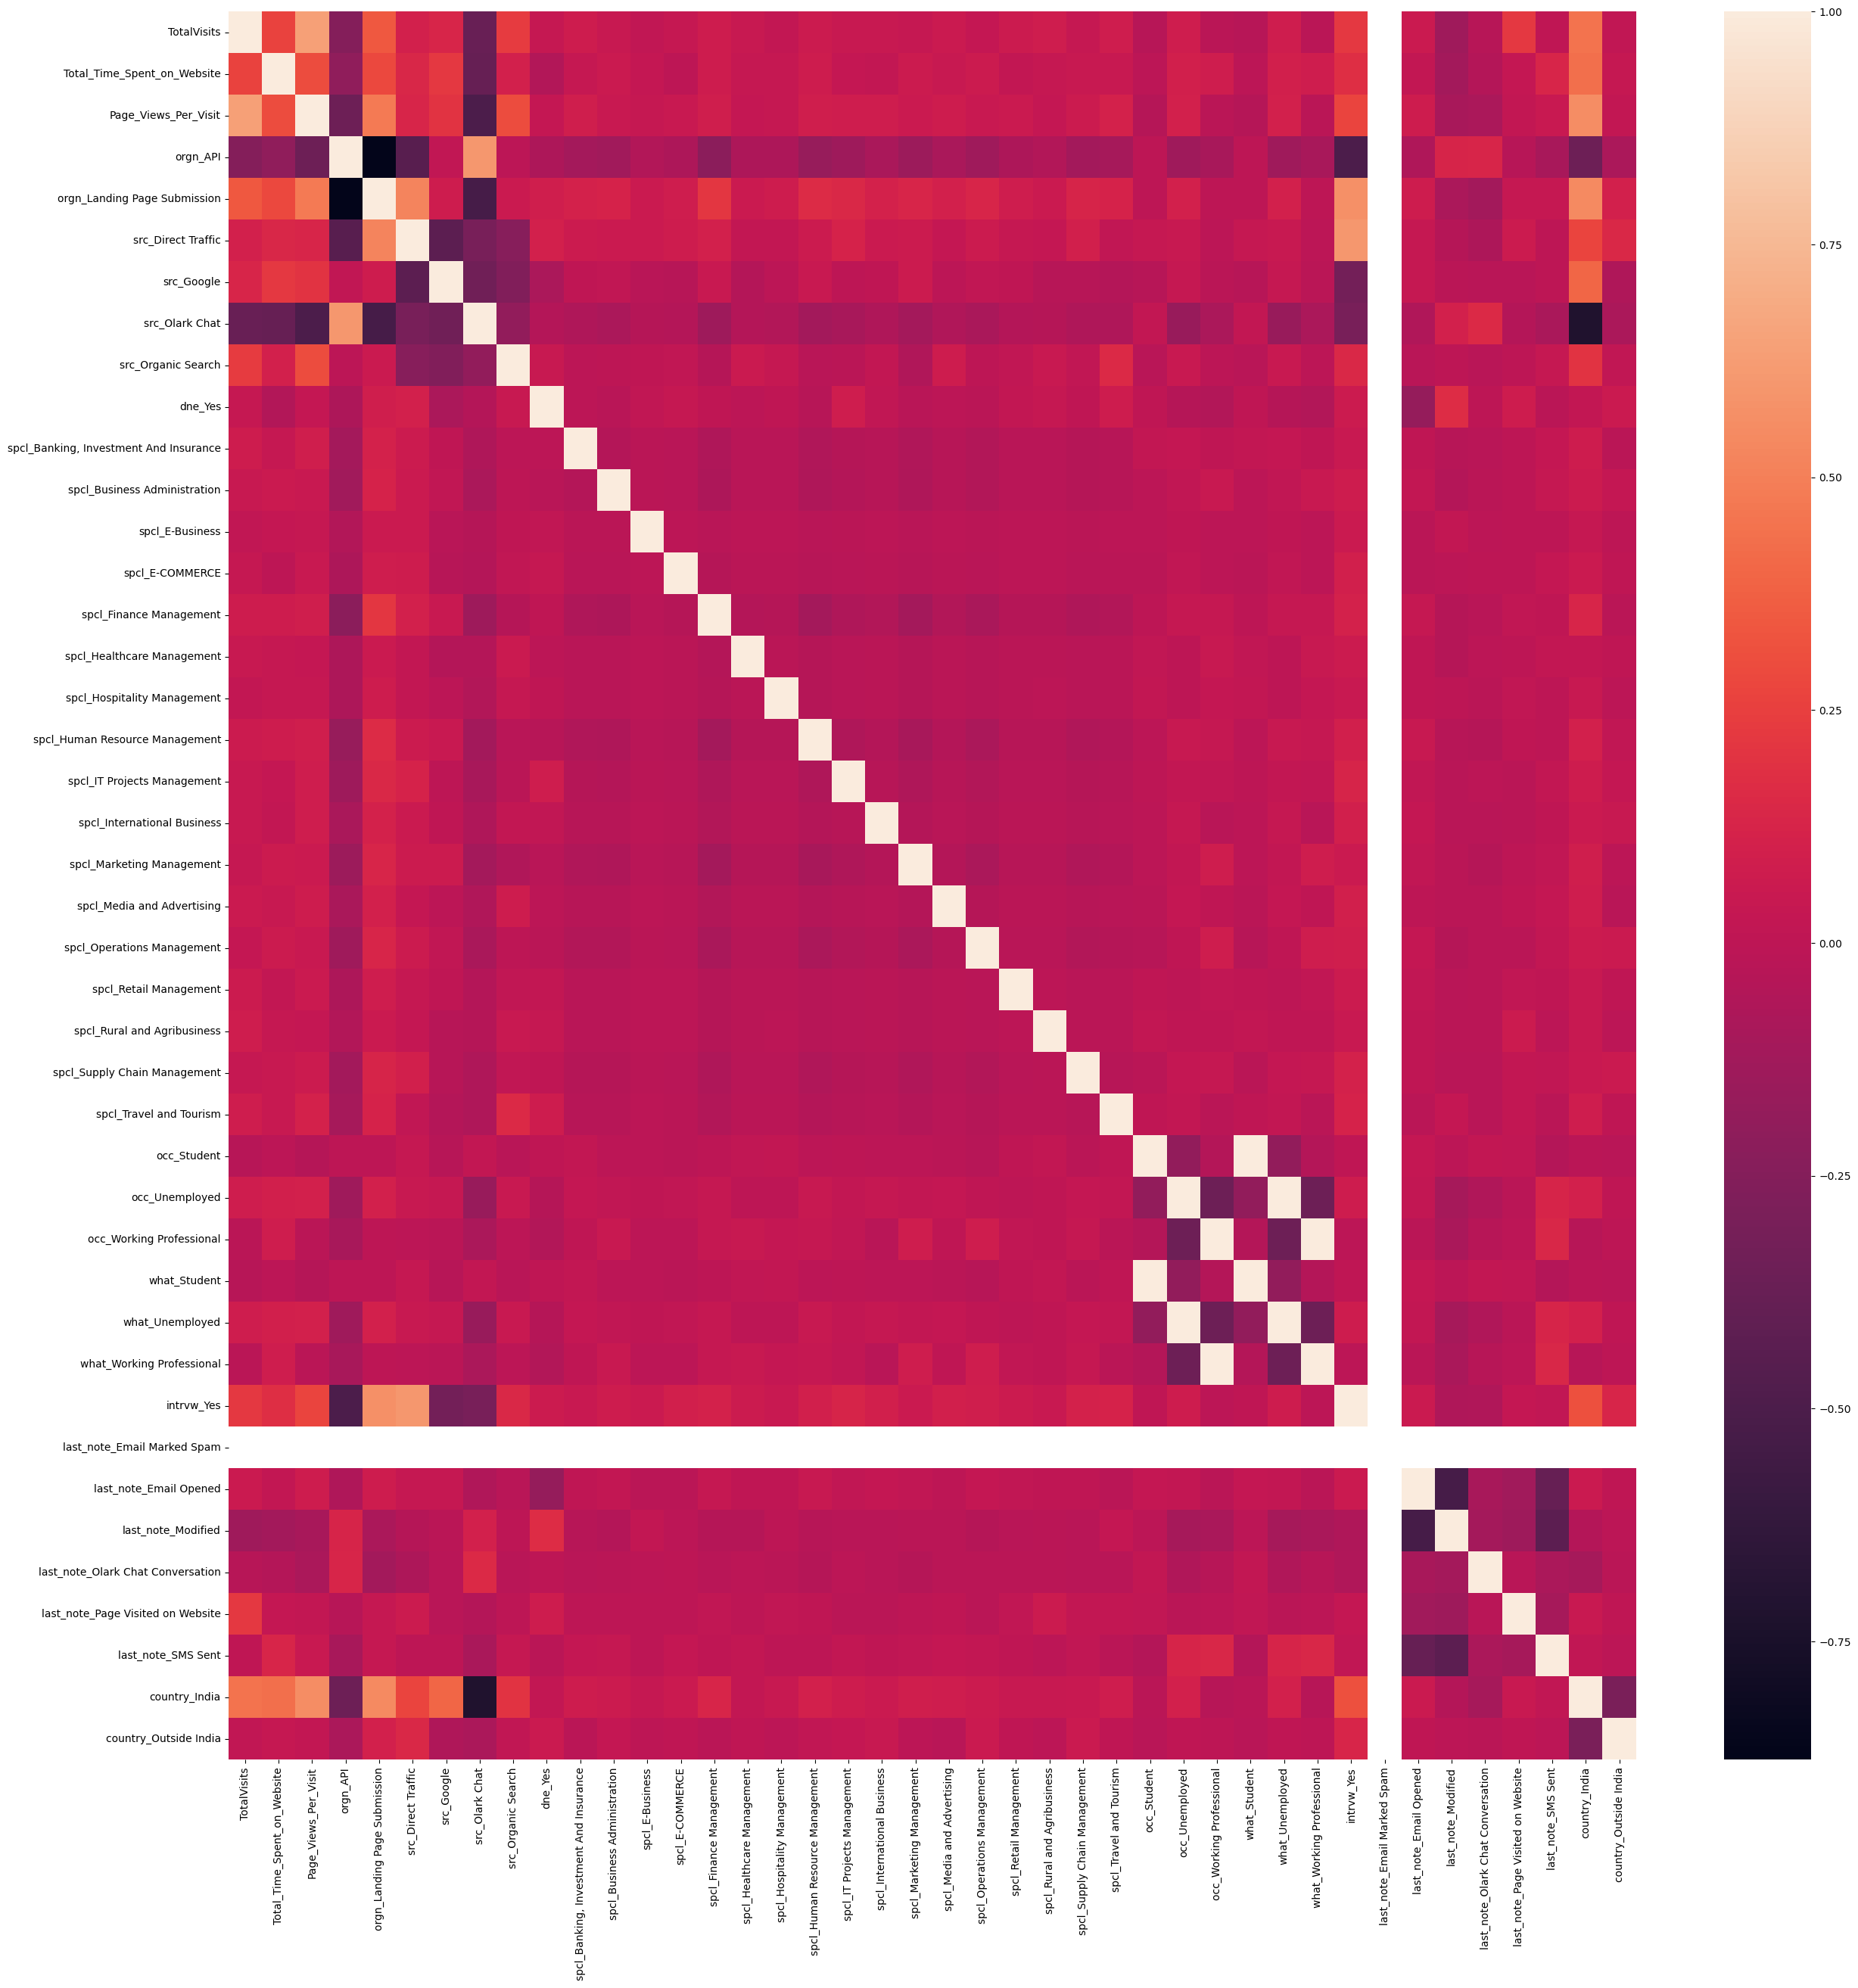

In [62]:
# heatmap to check the correlation
plt.figure(figsize=(30,30))
sns.heatmap(x_train.corr())

In [63]:
# Using RFE to get only the significant variables
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=30)
rfe = rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_) 

[ True  True False  True  True False False False False  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True False  True  True False False False
  True  True False  True  True  True]
[ 1  1  2  1  1  6 11 10  9  1  1  1  1  1  1  1 12  1  1  1  1  1  1  5
  1  1  1  1  1  1  3  1  1 13  4  7  1  1  8  1  1  1]


In [64]:
df=pd.DataFrame(list(x))
dfs=pd.DataFrame(rfe.support_)
dfs.rename(columns={0:'sup'}, inplace=True)
dffs=pd.concat([df,dfs], axis=1)
colnm=list(dffs[dffs['sup']==True][0])
colnm

['TotalVisits',
 'Total_Time_Spent_on_Website',
 'orgn_API',
 'orgn_Landing Page Submission',
 'dne_Yes',
 'spcl_Banking, Investment And Insurance',
 'spcl_Business Administration',
 'spcl_E-Business',
 'spcl_E-COMMERCE',
 'spcl_Finance Management',
 'spcl_Healthcare Management',
 'spcl_Human Resource Management',
 'spcl_IT Projects Management',
 'spcl_International Business',
 'spcl_Marketing Management',
 'spcl_Media and Advertising',
 'spcl_Operations Management',
 'spcl_Rural and Agribusiness',
 'spcl_Supply Chain Management',
 'spcl_Travel and Tourism',
 'occ_Student',
 'occ_Unemployed',
 'occ_Working Professional',
 'what_Unemployed',
 'what_Working Professional',
 'last_note_Modified',
 'last_note_Olark Chat Conversation',
 'last_note_SMS Sent',
 'country_India',
 'country_Outside India']

<Axes: >

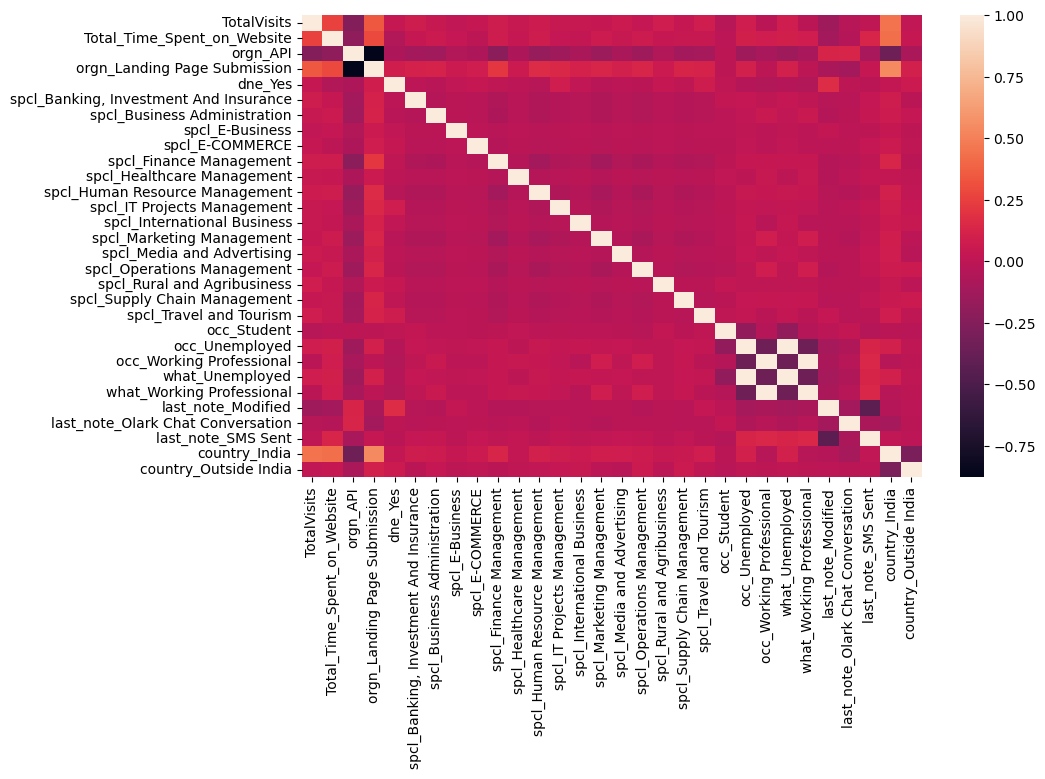

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(x_train[colnm].corr())

In [ ]:
# excluding the unnecessary variables

colnm = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional',  'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_Outside India']


import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[colnm]), family=sm.families.Binomial())
logm1.fit().summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[colnm].columns
vif['VIF'] = [variance_inflation_factor(x_train[colnm].values, i) for i in range(x_train[colnm].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logm2 = LogisticRegression()
logm2.fit(x_train[colnm], y_train)
logm2.coef_

In [ ]:
print(x_train[colnm].shape)
print(x_test[colnm].shape)

In [ ]:
logm2.predict_proba(x_train[colnm])

In [ ]:
# Assign lead score

# assigning lead score between 0 to 100
y_predict=logm2.predict_proba(x_test[colnm])
y_predict=pd.DataFrame(y_predict)
y_predict = y_predict.iloc[:,[1]]
y_predict.rename(columns={1:'predicted'}, inplace=True)
y_predict.index=y_test.index
y_prob=pd.concat([y_test,y_predict], axis=1)
y_prob['predicted']=y_prob['predicted'].map(lambda x: 0 if x<0.5 else 1)
lead_score=pd.DataFrame(logm2.predict_proba(x_test[colnm]))
lead_score=round(100*(lead_score.iloc[:,[1]]),0)
lead_score.rename(columns={1:'lead_score'}, inplace=True)
lead_score.head()

In [ ]:
# Accuracy of the model
round(metrics.accuracy_score(y_prob.Converted, y_prob.predicted),2)

In [ ]:
# ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_prob.Converted,y_prob.predicted)

In [ ]:
# Confusion Metrics
confusion = metrics.confusion_matrix( y_prob.Converted, y_prob.predicted )
confusion

In [ ]:
true_positives = 1421 
false_negatives = 223  
false_positives = 287
true_negatives = 707

print('Accuracy                ---  ', round((true_positives+true_negatives)*100/(true_positives+true_negatives+false_positives+false_negatives),2),'%')
print('Specificity             ---  ', round((true_negatives)*100/(true_negatives+false_positives),2),'%')
print('sensitivity/TPR/Recall  ---  ', round((true_positives)*100/(true_positives+false_negatives),2),'%')
print('FPR                     ---  ', round((false_positives)*100/(true_negatives+false_positives),2),'%')
print('Precision               ---  ', round((true_positives)*100/(true_positives+false_positives),2),'%')

Top three variables in the model that contribute most:

a. Lead Origin
b. Last Notable Activity
c. What is your current Occupation?


Top three categorical/dummy variables in the model that should be focused on the most.

a. occ_Working Professional
b. orgn_Landing Page Submission
c. Specialization